In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize
from scipy.signal import spectrogram
from scipy.signal import get_window
from sdas.tests.LoadSdasData import LoadSdasData
from sdas.tests.StartSdas import StartSdas
from scipy import signal
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy.optimize import curve_fit
import scipy.optimize as opt

In [3]:
# Load and select data
shot = 16573
client = StartSdas()

Vf_data0, time = LoadSdasData(
    client, 'IONIC.TR512_B02.CHANNEL_0', shot)
Vf_data1, time = LoadSdasData(
    client, 'IONIC.TR512_B02.CHANNEL_1', shot)
Vf_data2, time = LoadSdasData(
    client, 'IONIC.TR512_B02.CHANNEL_2', shot)
Vf_data3, time = LoadSdasData(
    client, 'IONIC.TR512_B02.CHANNEL_3', shot)
Vf_data4, time = LoadSdasData(
    client, 'IONIC.TR512_B02.CHANNEL_4', shot)
Vf_data5, time = LoadSdasData(
    client, 'IONIC.TR512_B02.CHANNEL_5', shot)
Vf_data6, time = LoadSdasData(
    client, 'IONIC.TR512_B02.CHANNEL_6', shot)
Vf_data7, time = LoadSdasData(
    client, 'IONIC.TR512_B02.CHANNEL_7', shot)

Vf_data=[Vf_data0,Vf_data1,Vf_data2,Vf_data3,Vf_data4,Vf_data5,Vf_data6,Vf_data7]

names=['Pin_0','Pin_1','Pin_2','Pin_3','Pin_4','Pin_5','Pin_6','Pin_7'] 


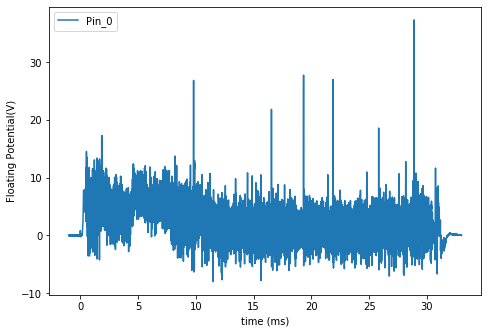

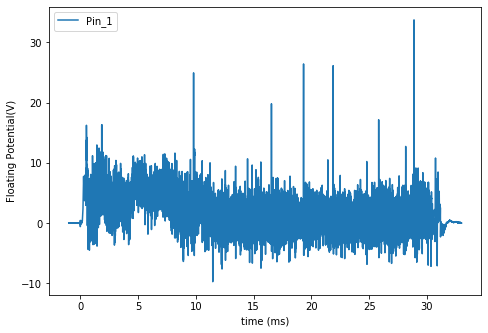

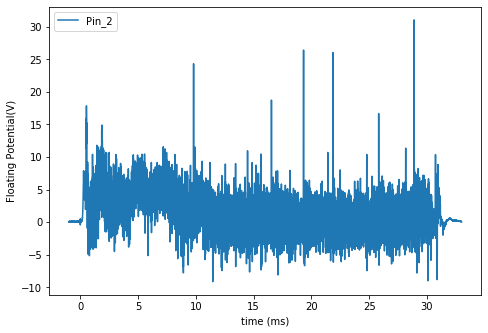

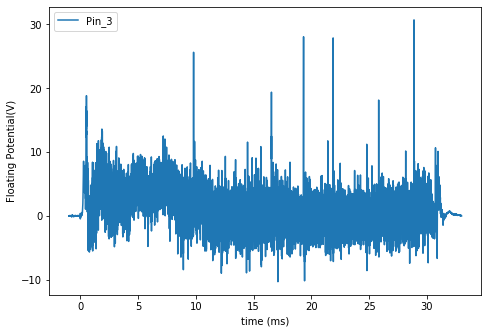

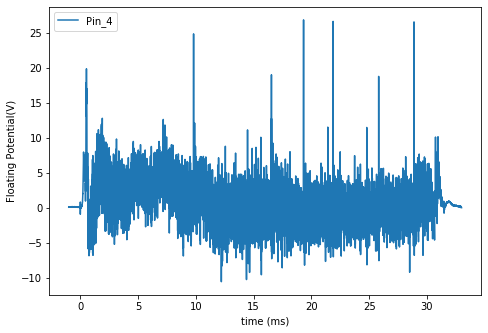

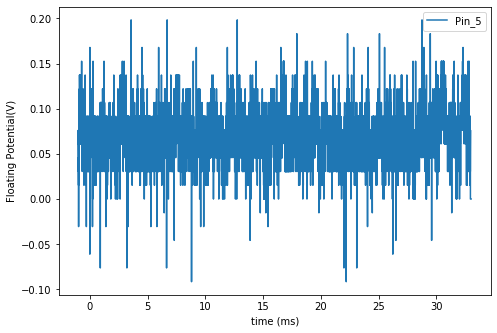

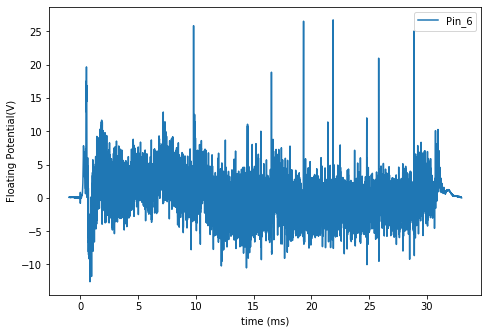

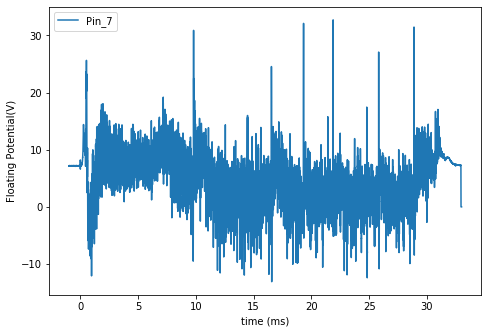

In [4]:
for i in range(0,len(Vf_data)):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.plot(time/1000 , Vf_data[i],label=names[i],markersize=2)
    ax.set_xlabel('time (ms)')
    ax.set_ylabel('Floating Potential(V)')
    ax.legend()
    fig.savefig('16573/Vf'+names[i]+'no.png',bbox_inches='tight',pad_inches=0.1)

In [5]:
for i in range(0,len(Vf_data)):
    y = signal.savgol_filter(Vf_data[i],1001, 1)
    Vf_data[i]=Vf_data[i]-y

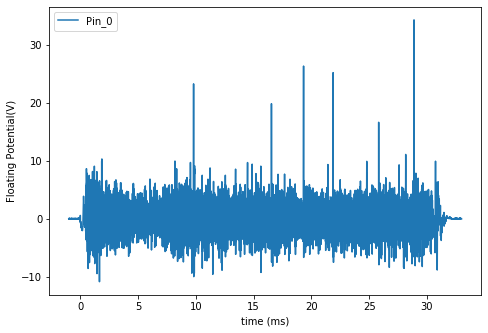

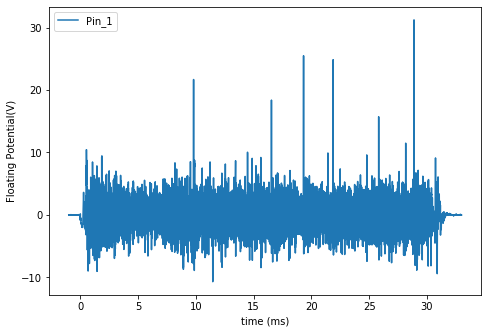

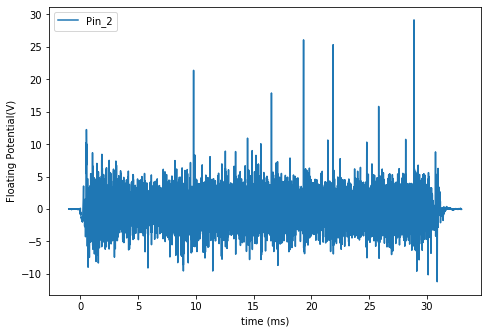

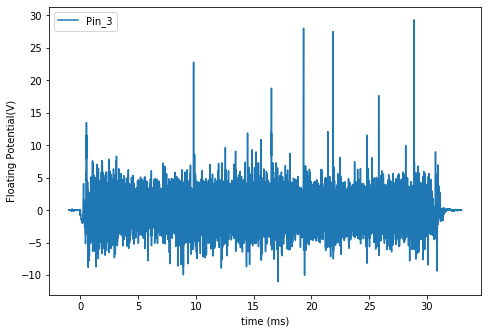

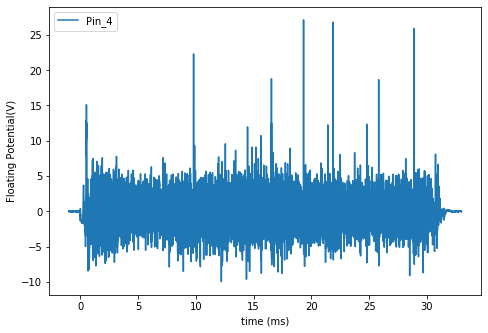

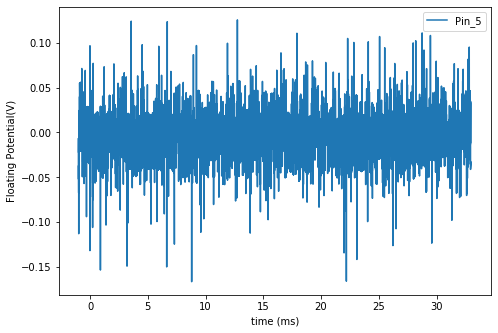

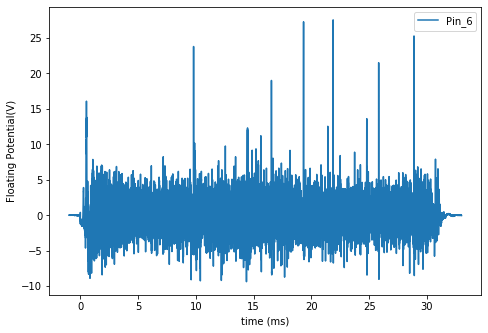

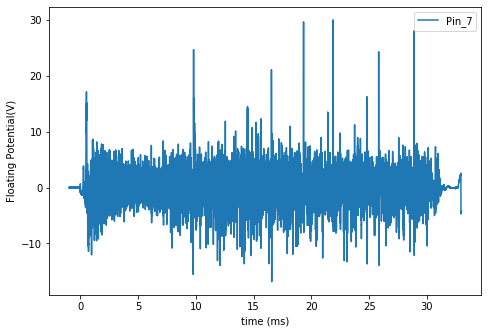

In [6]:
for i in range(0,len(Vf_data)):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.plot(time/1000 , Vf_data[i],label=names[i],markersize=2)
    ax.set_xlabel('time (ms)')
    ax.set_ylabel('Floating Potential(V)')
    ax.legend()
    fig.savefig('16573/Vf'+names[i]+'.png',bbox_inches='tight',pad_inches=0.1)

2000000.0
1500
1333.3333333333333
0.00075


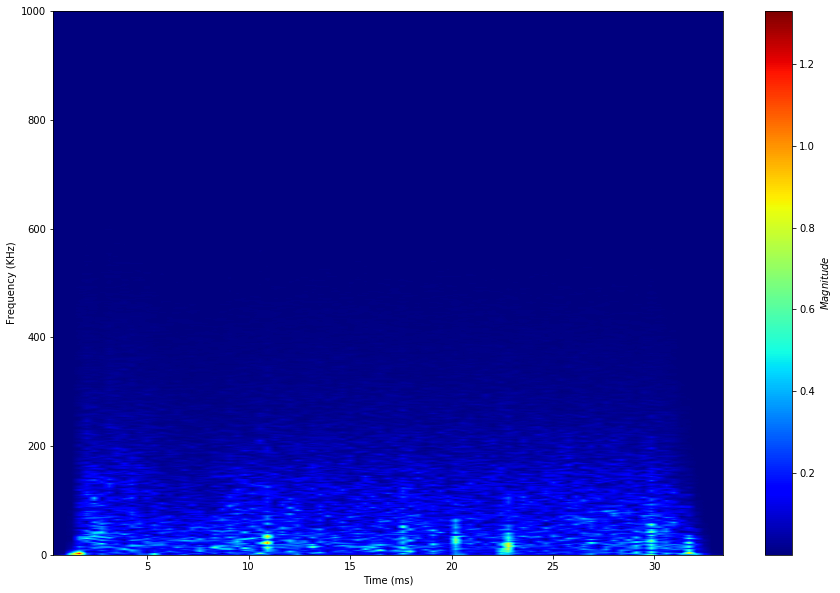

In [7]:
#Spectogram

fs=1/(0.000001*(time[1]-time[0])) #sampling frequency of the x time series
Nwindow= int(0.00075*fs)
window=get_window('hann',Nwindow,True)
nperseg= Nwindow  #int(1000*fs)   #lenght of each segment 
noverlap= nperseg*0.5  #number of points to overlap between segments
nfft=Nwindow/2  #lengh of the fft used
scalling='spectrum'  #between density and spectrum
mode= 'magnitude'      #what kind of values are returned psd complex magnitude angle phase

print(fs)
print(Nwindow)
print(fs/Nwindow)
print(Nwindow/fs)

f,t,Sxx=spectrogram(Vf_data[0],fs,window=window,nperseg=nperseg,noverlap=noverlap, scaling = scalling ,mode=mode)
f1=[f[i]for i in range(0,len(f))]
Sxx1=[Sxx[i] for i in range(len(f)-1,0,-1)]
fig = plt.figure(figsize=(15,10))
plt.imshow(Sxx1, cmap= 'jet',extent=(np.min(t)*1000,np.max(t)*1000,np.min(f1)/1000,np.max(f1)/1000),aspect='auto',interpolation='bilinear')
plt.colorbar().set_label('$Magnitude$')
plt.xlabel('Time (ms)')
plt.ylabel('Frequency (KHz)')
fig.savefig('16573/Spectogram.png',bbox_inches='tight',pad_inches=0.1)

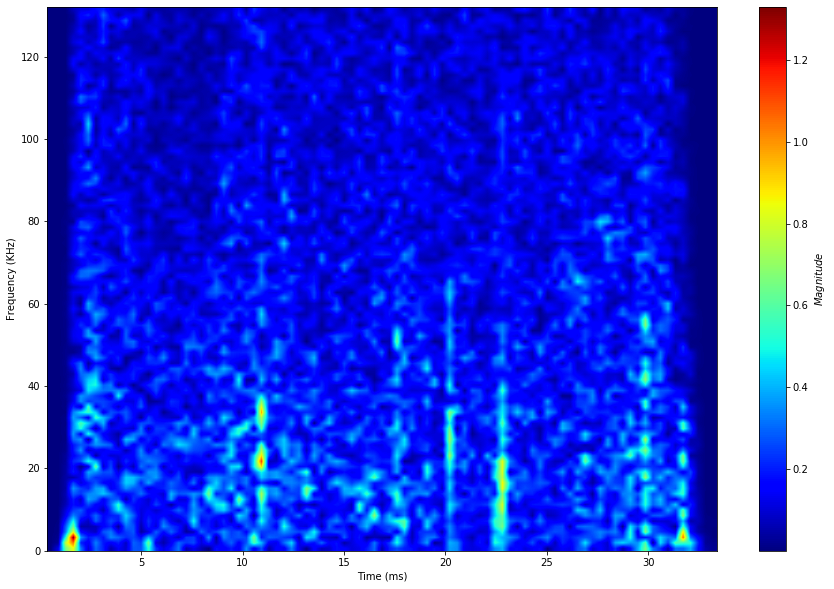

In [8]:
f1=[f[i]for i in range(0,100)]
Sxx1=[Sxx[i] for i in range(100,0,-1)]
fig = plt.figure(figsize=(15,10))
plt.imshow(Sxx1, cmap= 'jet',extent=(np.min(t)*1000,np.max(t)*1000,np.min(f1)/1000,np.max(f1)/1000),aspect='auto',interpolation='bilinear')
plt.colorbar().set_label('$Magnitude$')
plt.xlabel('Time (ms)')
plt.ylabel('Frequency (KHz)')
fig.savefig('16573/Spectogramzoom.png',bbox_inches='tight',pad_inches=0.1)

In [9]:
ti=15000
tf=25000
bool_indices = (time >ti) & (time < tf)

for i in range(0,len(Vf_data)):
    Vf_data[i]=Vf_data[i][bool_indices]
time = time[bool_indices]

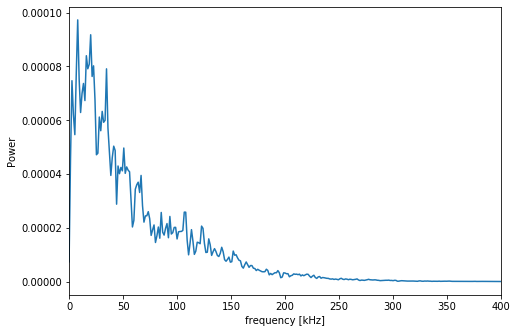

In [10]:
fs=1/(0.000001*(time[1]-time[0])) 
Nwindow= int(0.00075*fs)
window=get_window('hann',Nwindow,True)
nperseg= Nwindow  #int(1000*fs)   #lenght of each segment 
noverlap= nperseg*0.5  #number of points to overlap between segments
nfft=nperseg  #lengh of the fft used

f, Pxx_den = signal.welch(Vf_data[0], fs, window=window, nperseg=nperseg,noverlap=noverlap)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(f/1000, Pxx_den)
ax.set_xlim(0,400)
ax.set_xlabel('frequency [kHz]')
ax.set_ylabel('Power')

fig.savefig('16573/PowerSpectra.png',bbox_inches='tight',pad_inches=0.1)

In [11]:
print(np.max(Pxx_den))
print(f[np.argmax(Pxx_den)]/1000)
print(Pxx_den[np.argmax(Pxx_den)])

9.7306816e-05
8.0
9.7306816e-05


In [12]:
ti=15000
tf=17000

In [13]:
bool_indices = (time >ti) & (time < tf)

for i in range(0,len(Vf_data)):
    Vf_data[i]=Vf_data[i][bool_indices]
time = time[bool_indices]

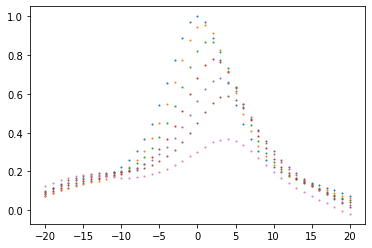

In [14]:
Vf_data.pop(5)
names.pop(5)
mean=np.zeros(len(Vf_data))
for i in range(0,len(Vf_data)):
    mean[i]=np.mean(Vf_data[i])
    
V_datacorr=np.zeros((len(Vf_data),len(Vf_data[0])))

for i in range(0,len(Vf_data)):
    V_datacorr[i]=[(Vf_data[i][j]) for j in range(0,len(Vf_data[i]))]

lag=np.zeros((len(Vf_data),41))
c=np.zeros((len(Vf_data),41))

for i in range(0,len(Vf_data)):
    lag[i],c[i],line,b=plt.xcorr(V_datacorr[0],V_datacorr[i],normed=True ,usevlines=False,markersize=1,maxlags=20)

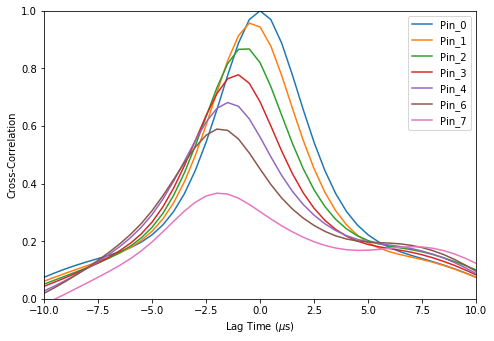

In [15]:
#Draw data

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
for i in range(0,len(lag)):
    ax.plot(-lag[i]*0.5 ,c[i],label=names[i])

ax.set_xlabel('Lag Time ($\mu$s)')
ax.set_ylabel('Cross-Correlation')
ax.set_xlim(-10,10)
ax.set_ylim(0,1)
ax.legend()
fig.savefig('16573/Correlationall.png',bbox_inches='tight',pad_inches=0.1)

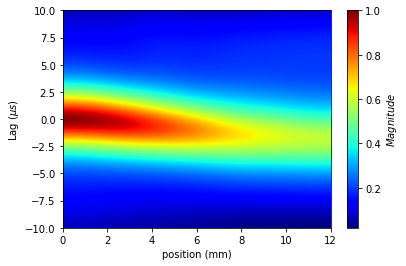

In [16]:
angle=[0,2,4,6,8,10,12]
aux=[(c[5][i]+c[4][i])/2 for i in range(0,len(c[5]))]
countor=[c[0],c[1],c[2],c[3],c[4],aux,c[5]]



fig = plt.figure()
plt.imshow(np.transpose(countor), cmap= 'jet',extent=(np.min(angle),np.max(angle),np.min(lag[0]*0.5),np.max(lag[0]*0.5)),aspect='auto',interpolation='bicubic',norm=Normalize())
plt.colorbar().set_label('$Magnitude$')
#plt.ylim(-30,30)
plt.xlabel('position (mm)')
plt.ylabel('Lag ($\mu s$)')
fig.savefig('16573/Correlation3d.png',bbox_inches='tight',pad_inches=0.1)

[0.98927547 0.01277918 3.13336148]
[[ 2.98653382e-05  9.43110319e-06 -1.47144564e-04]
 [ 9.43110319e-06  2.87254790e-04 -1.58004993e-04]
 [-1.47144564e-04 -1.58004993e-04  1.58714132e-03]]
[ 0.95249718 -0.3767047   3.09163598]
[[ 1.33489796e-05 -2.90161269e-06 -7.90213910e-05]
 [-2.90161269e-06  1.42061684e-04  5.58861304e-05]
 [-7.90213910e-05  5.58861304e-05  9.78474157e-04]]
[ 0.86510233 -0.73648975  3.19718027]
[[ 1.61493030e-05 -3.53668576e-07 -9.61036280e-05]
 [-3.53668576e-07  2.00561325e-04  6.90203031e-06]
 [-9.61036280e-05  6.90203031e-06  1.21772292e-03]]
[ 0.77141496 -1.11003404  3.27747454]
[[ 1.25823323e-05 -3.38978115e-06 -8.97143746e-05]
 [-3.38978115e-06  2.17973350e-04  7.98134974e-05]
 [-8.97143746e-05  7.98134974e-05  1.36117371e-03]]
[ 0.67747206 -1.45290145  3.42947536]
[[ 4.68592587e-06 -7.01401771e-07 -5.19788791e-05]
 [-7.01401771e-07  1.34438477e-04  2.46231010e-05]
 [-5.19788791e-05  2.46231010e-05  1.16430339e-03]]
[ 0.58745506 -1.85330406  3.58644752]
[[ 3.

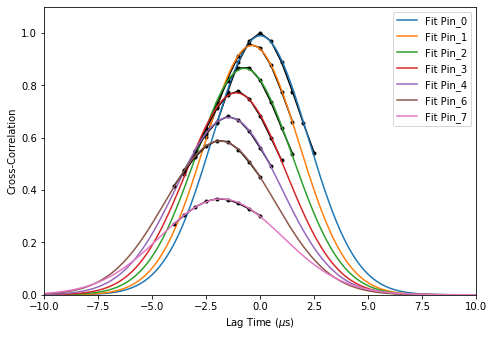

In [27]:
def func(x,a,b,c):
    return a*np.exp(-(x-b)*(x-b)/(c*c))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
par=np.zeros((len(c),3))
covariance=np.zeros((len(c),3,3))
auxx=[15,17,17,18,19,20,20]
summ=[10,9,10,10,9,9,9]
for i in range(0,7):
    lagaux=[-lag[i][j]*0.5 for j in range(int(auxx[i]),int(auxx[i]+summ[i]))]
    caux=[c[i][j] for j in range(int(auxx[i]),int(auxx[i]+summ[i]))]
    par[i], covariance[i] = curve_fit(func,lagaux,caux,[1,0,1])
    x=np.linspace(-10,10,1000)
    y=[func(x[j], par[i][0],par[i][1],par[i][2]) for j in range(0,1000)]
    ax.plot(lagaux ,caux,marker='.',color='black')
    ax.plot(x,y,label='Fit '+names[i])
    print(par[i])
    print(covariance[i])
ax.set_xlim(-10,10)
ax.set_ylim(-0,1.1)
ax.set_xlabel('Lag Time ($\mu$s)')
ax.set_ylabel('Cross-Correlation')
ax.legend(loc=1)    
fig.savefig('16573/Fitgauss.png',bbox_inches='tight',pad_inches=0.1)  

In [430]:
args=[par[0][0],par[0][1],par[0][2],par[0][3]]
x0=3
x_roots = opt.root(lambda x:(func(x,par[0][0],par[0][1],par[0][2],par[0][3])-np.exp(-1)),x0)
print(x_roots)

    fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([-1.54809665e-10])
       r: array([0.23837425])
  status: 1
 success: True
       x: array([3.06432349])


[[[2.03115302e-13 1.00000000e+00]
  [0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00]]]
0.01
[[[-3.52676338  0.36804922]
  [ 3.52676338  0.36804922]]]


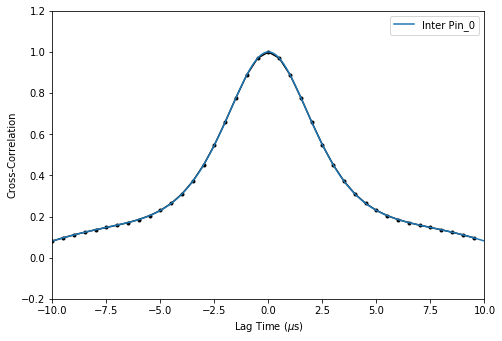

In [478]:
### get time lag at maximum
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
max=np.zeros((1,4,2))
points=np.zeros((1,2,2))
caux=[[c[i][j]  for j in range (len(c[i])-1,0,-1)] for i in range(0,7)]
laux=[[-lag[i][j]*0.5 for j in range (len(lag[i])-1,0,-1)] for i in range(0,7)]
for i in range(0,1):
    f=InterpolatedUnivariateSpline(laux[i],caux[i],k=4)
    cr_pts = f.derivative().roots()
    cr_values=f(cr_pts)
    for j in range(0,len(cr_pts)):
        max[i][j]=[cr_pts[j],cr_values[j]]
    x=np.linspace(-10,10,2000)
    y=[f(x[i]) for i in range(0,2000)]
    ax.plot(laux[i] ,caux[i],marker='.',color='black')
    ax.plot(x,y,label='Inter '+names[i])
    ii=0
    for j in x:
        aux=np.exp(-1)
        if f(j)-aux<0.001 and f(j)-aux>-0.001:
            points[i][ii][0]=j
            points[i][ii][1]=f(j) 
            ii=ii+1
print(max) 
print(20/2000)
print(points)
ax.set_xlim(-10,10)
ax.set_ylim(-0.2,1.2)
ax.set_xlabel('Lag Time ($\mu$s)')
ax.set_ylabel('Cross-Correlation')
ax.legend(loc=1)    
fig.savefig('16573/Interpolation.png',bbox_inches='tight',pad_inches=0.1)

[-0.78137169 -7.05019863]
[[0.88865278 0.61145353]
 [0.61145353 0.58628941]]
[-0.40477828 -6.24211184]
[[0.21190342 0.15742612]
 [0.15742612 0.17125345]]


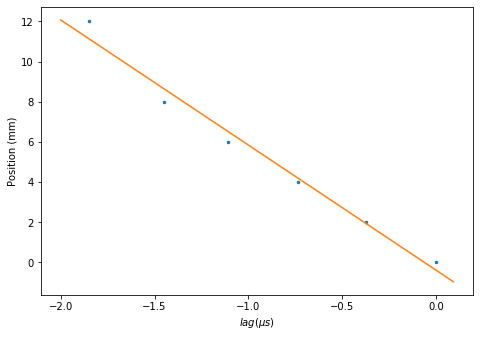

In [475]:
deltax1 =[0,2,4,6,8,12,14]
deltatemp1=[par[j][1]for j in range(0,7)]

deltax2 =[0,2,4,6,8,12]
deltatemp2=[par[j][1] for j in range(0,6)]

def func(x,a,b):
    return a + b * x

parameters1, covariance1 = curve_fit(func, deltatemp1, deltax1)
parameters2, covariance2 = curve_fit(func, deltatemp2, deltax2)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(deltatemp2, deltax2, '.', label='data', markersize=5)
time2=np.arange(-2,0.1,0.01)
#ax.plot(time2, func(time2, parameters1[0],parameters1[1]), label='fit1')
ax.plot(time2, func(time2, parameters2[0],parameters2[1]), label='fit2')
ax.set_xlabel('$lag (\mu s)$')
ax.set_ylabel('Position (mm)')
fig.savefig('16573/fit.png',bbox_inches='tight',pad_inches=0.1)

print(parameters1)
print(covariance1)
print(parameters2)
print(covariance2)

In [462]:
lifetime=[np.abs(points[0][i][0]-max[0][0][0]) for i in range(0,2)]
print(np.mean(lifetime))

3.5335335335335336


In [463]:
size1=np.abs(parameters1[1])*np.mean(lifetime)
size2=np.abs(parameters2[1])*np.mean(lifetime)

In [464]:
print(size1)
print(size2)

24.912113267456782
22.056711520441812


print(delta_temp)

In [465]:
pointst=[2,4,6,8,12]
pointscorr=[par[i][0] for i in range(1,6)]

[[20.85948158  0.36780381]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]]
[0.05030669 1.05039446]
[[9.33251725e-06 5.20446521e-05]
 [5.20446521e-05 3.90207360e-04]]


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


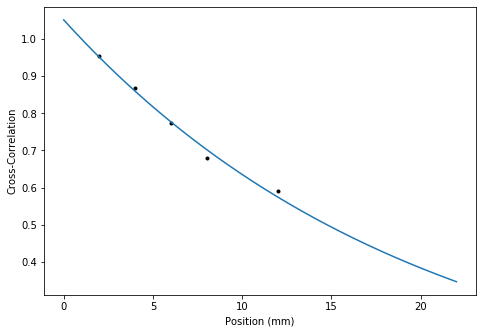

In [490]:
# get time lag at maximum
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
def func(x,a,b):
    return b*np.exp(-a*x)

parameters1, covariance1 = curve_fit(func, pointst, pointscorr)
x=np.linspace(0,22,2200)
y=[func(x[i],parameters1[0],parameters1[1]) for i in range(0,2200)]
ax.plot(pointst ,pointscorr,'.',color='black')
ax.plot(x,y,label='Inter '+names[i])
#ax.set_xlim(-10,10)
#ax.set_ylim(-0.2,1)
ax.set_xlabel('Position (mm)')
ax.set_ylabel('Cross-Correlation')   

points=np.zeros((10,2))
ii=0
for j in x:
    aux=np.exp(-1)
    if func(j,parameters1[0],parameters1[1])-aux<0.0001 and func(j,parameters1[0],parameters1[1])-aux>-0.0001:
        points[ii][0]=j
        points[ii][1]=func(j,parameters1[0],parameters1[1]) 
        ii=ii+1
print(points)        
fig.savefig('size.png',bbox_inches='tight',pad_inches=0.1)
fig.show()
print(parameters1)
print(covariance1)

##### pointst

In [492]:
pointscorr

[0.36813354393154263,
 0.36684001163689295,
 0.36779764669350423,
 0.3684185188244239,
 0.3679609111013345,
 0.3675404808740642,
 0.0]

In [172]:
len(Vf_data[0])

3999

In [37]:
np.exp(-1)

0.36787944117144233